<a href="https://colab.research.google.com/github/cagBRT/Diffusers/blob/main/Intro_to_Interacting_with_CLIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you interact with the CLIP model. <br>

The model is trained using images found on the internet with the <alt> text used as the prompt. <br>

You upload three images from UnSplash (a Google website with copyright free images). <br>
Then ask the model to predict the best text prompt for each image. <br>

Then to see how well CLIP does on images and text it has never seen before, we give it an image and a text prompt it has not seen before. <br>


**Install and import libraries**

In [ ]:
#https://github.com/cagBRT/Diffusers.git

!git clone -l -s https://github.com/cagBRT/Diffusers.git cloned-repo
%cd cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 669, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (99/99), done.
remote: Total 669 (delta 97), reused 136 (delta 76), pack-reused 494
Receiving objects: 100% (669/669), 263.39 MiB | 19.86 MiB/s, done.
Resolving deltas: 100% (265/265), done.
Updating files: 100% (186/186), done.
/content/cloned-repo


In [ ]:
!pip install transformers
!pip install datasets
!pip install torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 1.4 MB/s eta 0:00:00


In [ ]:
import transformers
import datasets
import numpy as np
import pandas as pd
import torch
from PIL import Image
import requests

from transformers import CLIPTokenizerFast, CLIPProcessor, CLIPModel

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "openai/clip-vit-base-patch32"

# we initialize a tokenizer, image processor, and the model itself
tokenizer = CLIPTokenizerFast.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)
model = CLIPModel.from_pretrained(model_id).to(device)

**Get the UnSplash Photos**

In [ ]:
urls=['https://images.unsplash.com/photo-1662955676669-c5d141718bfd?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=687&q=80',
    'https://images.unsplash.com/photo-1552053831-71594a27632d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=662&q=80',
    'https://images.unsplash.com/photo-1530281700549-e82e7bf110d6?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=688&q=80' ]

images=[Image.open(requests.get(i, stream=True).raw)  for i in urls]

In [ ]:
images

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=687x1031>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=662x1061>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=688x1031>]

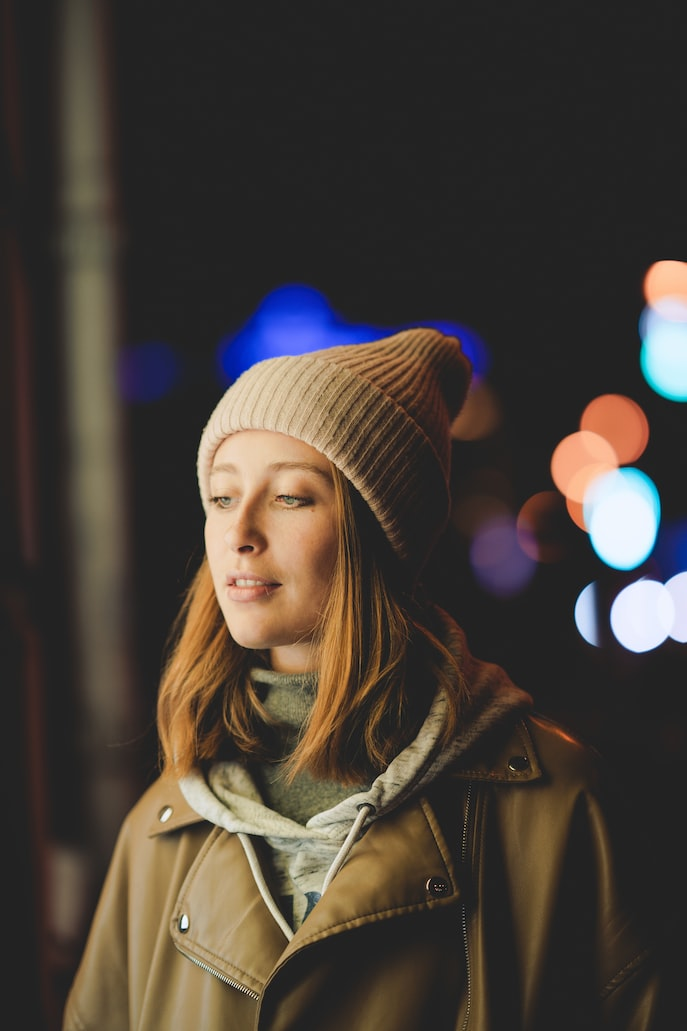

In [ ]:
images[0]

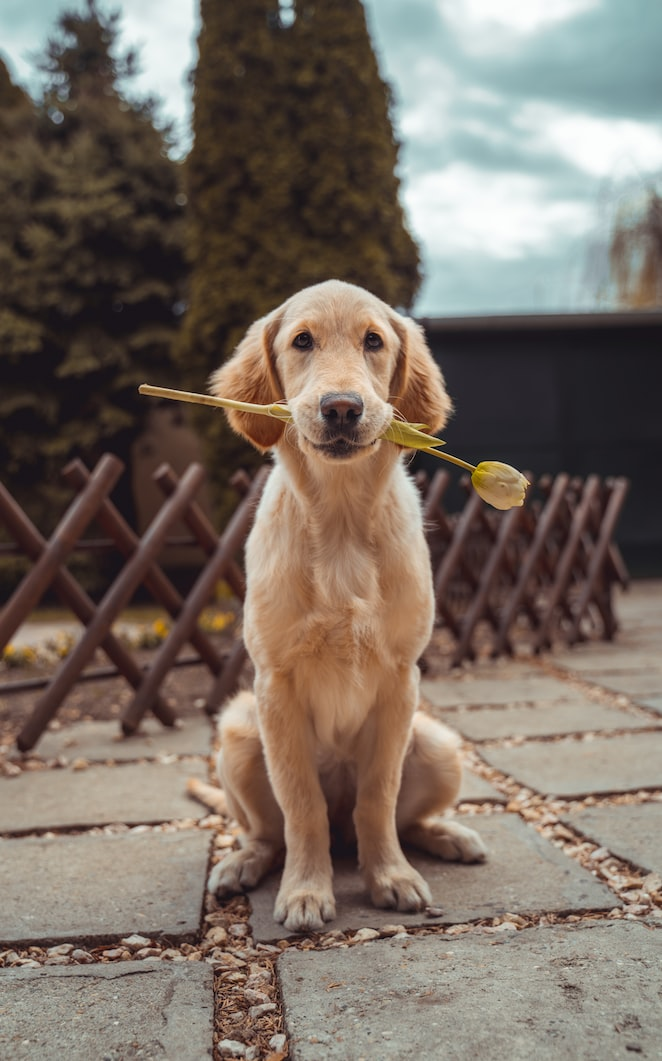

In [ ]:
images[1]


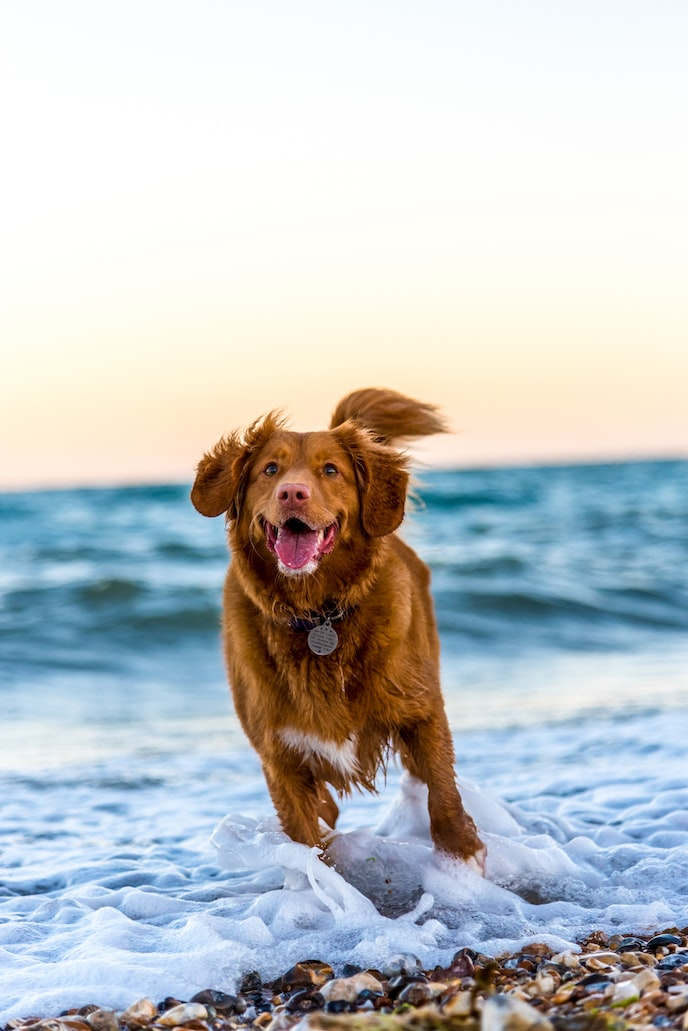

In [ ]:
images[2]

**Write a collection of prompts**

In [ ]:
text_prompts=["a girl wearing a beanie", "a boy wearing a beanie", "a dog", "a dog at the beach"]
inputs = processor(text=text_prompts, images=images, return_tensors="pt", padding=True)

**Have the model predict the text prompt for each image**

In [ ]:
outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

In [ ]:
pd.DataFrame(probs.detach().numpy()*100, columns=text_prompts, index=list(['image1','image2', 'image3'])).style.background_gradient(axis=None,low=0, high=0.91).format(precision=2)

In [ ]:
text_prompts=["a girl wearing a beanie", "a boy wearing a beanie", "a dog", "a dog at the beach","russian dolls"]
inputs = inputs = processor(text=text_prompts, images=images, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

Use a image that the model has not seen before. <br>
Can it predict a text description?

In [ ]:
#images_new = "russsian dolls.jpeg"
images_new="screaming people.png"

In [ ]:
images4=Image.open(images_new)

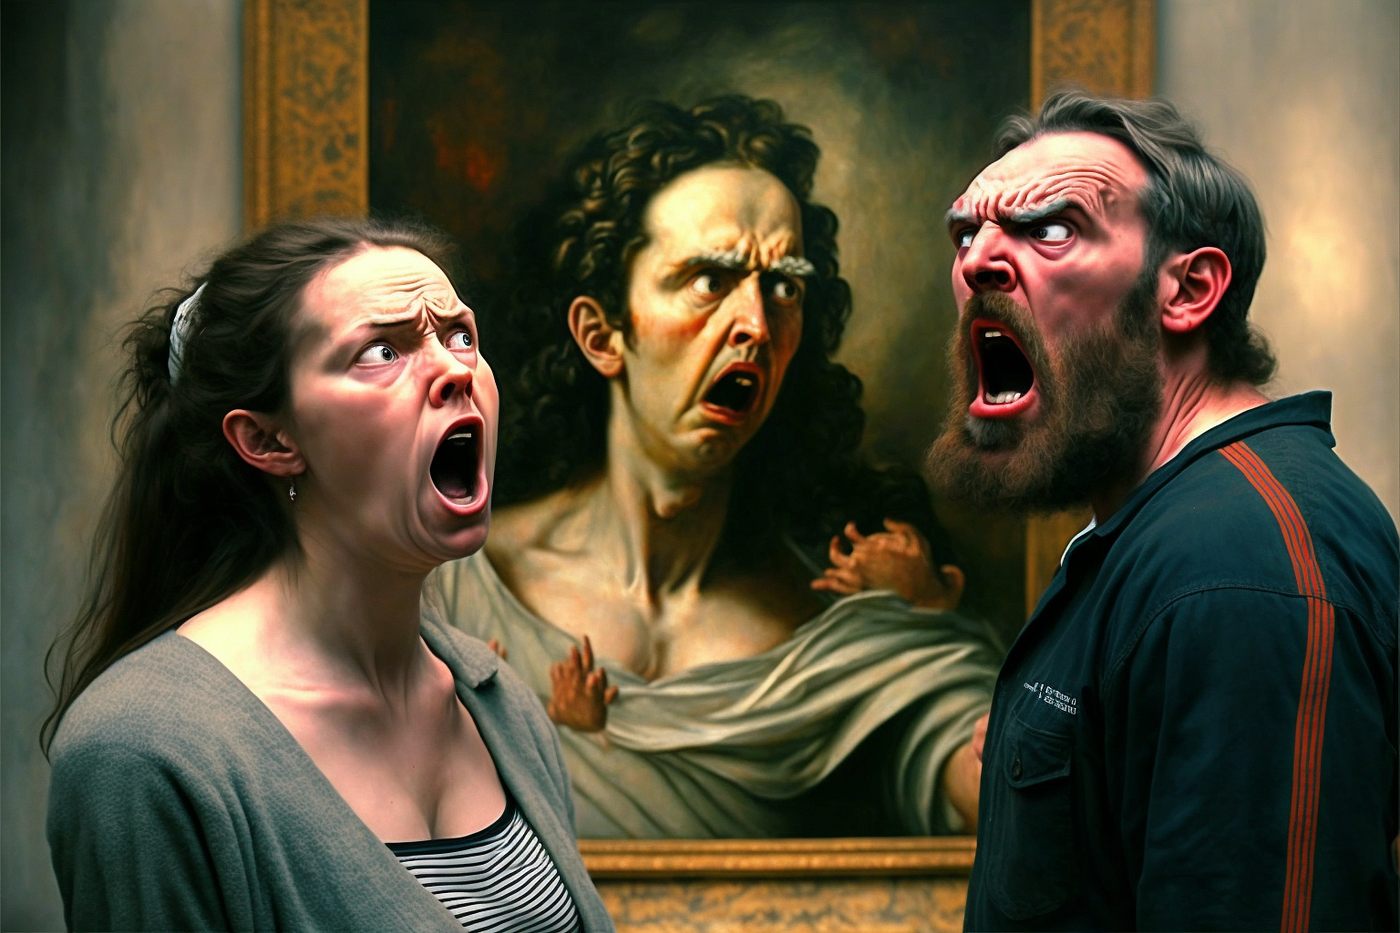

In [ ]:
images4

In [ ]:
images.append(images4)

In [ ]:
image4=images[3]

**Add another prompt to the list.** <br>
**See the models predictions**

In [ ]:
text_prompts=["a girl wearing a beanie","a boy wearing a beanie", "a dog", "a dog at the beach","russian dolls"]#, "herd of cats","screaming people"]
inputs = inputs = processor(text=text_prompts, images=images, return_tensors="pt", padding=True)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image
probs = logits_per_image.softmax(dim=1)

In [ ]:
pd.DataFrame(probs.detach().numpy()*100, columns=text_prompts, index=list(['image1','image2', 'image3','image4'])).style.background_gradient(axis=None,low=0, high=0.91).format(precision=2)

**Assignment**<br>
Find another image, see how the model does with an image it has never seen before. <br>
Try different prompts, how does the model do when the prompts are similar?(girl with beanie, woman in winter gear, girl in winter wear)